## 경사하강법이란?

- 손실을 줄이는 알고리즘
- 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법 중 하나다

### 점진적인 학습 또는 온라인 학습

## 확률적 경사 하강법(SGD)

## 확률적 경사 하강법을 활용한 분류 모델

### 필수 라이브러리 로딩

In [7]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [6]:
%matplotlib inline
# 시각화를 주피터노트북내에 바로 반영하기 위해
%config Inlinebackend.figure_format = 'retina'
# 시각화를 선명하게

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)
# 경고문구 무시
warnings.filterwarnings('ignore')

### 훈련 데이터 로딩

In [8]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [11]:
# target 고유값 추출
fish['Species'].unique()

# 두개는 넘음(이진분류X), 우리가 지금 하고 잇는건 다중분류엿다..!

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
# Species를 제외한 나머지 특성은 입력 데이터
# Species는 타깃 데이터 (우리는 생선 품종을 고를거기 때문에)

fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
# 하나이상의 컬럼을 가져올때는 []안에 []리스트업
# 머신에 돌리려면 넘파이 배열로 바꿔야 됨
fish_target = fish['Species'].to_numpy()

### 특성 전처리와 훈련세트, 테스트세트 분리

- 정규화와 표준화를 시키는 이유가 뭘까
  - 특성들간의 단위가 맞지않으면 맞춰줘야 다양한 알고리즘에 다 적용할 수 있다
  - 그리고 단위간에 너무 차이가 나면 과대적합이 발생할 수 있다
  - 특성 스케일링
  - 스케일링은 모델을 학습시키기 전까지만 하면 됨
  - 정규화는 값이 범위가 0~1사이로 바뀌는것
  - 표준화는 정규분포를 표준분포로 만드는것  

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 표준화
ss = StandardScaler()
ss.fit(train_input)
# 스탠다드스케일은 트레인만 학습시키고
# 테스트는 학습X (정답이 없음) = 이건 비지도학습

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 확률적 경사 하강법으로 모델 훈련

In [15]:
# SGDClassifier 클래스 : 확률적 경사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier

# loss function(손실함수), 손실 함수의 종류를 지정하는 매개변수(loss)
# 이진분류회귀 : 이진크로스엔트로피
# 다중분류회귀 : 크로스엔트로피, 소프트맥스
# max_iter : 수행할 에포크 횟수
# 에포크 : 전체 훈련 데이터 샘플을 사용하는 것
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
# log = 로지스틱 회귀를 쓰겟다
sc.fit(train_scaled, train_target)
# 얘는 스케일한거를 써야됨

# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 학습데이터에 대한 정확도와 테스트 데이터에 대한 정확도를 구할것

# 결과를 보니 적당한 위치에 조금 부족(?)해서 에포크 수를 늘려야 할것같음

0.773109243697479
0.775


In [18]:
# 모델을 이어서 훈련할때 partial_fit()
# 모델을 새로 생성하지 않음
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 에포크를 10번 더 돌리니까 점수가 조금 올랏음
# 하지만 너무 많이 돌려도 과대적합을 발생시킬 수 있음
# 가장 적절한 에포크 횟수를 찾아야한다

0.8067226890756303
0.8


### 가장 적절한 에포크 횟수 찾기

- 에포크 횟수가 적어 모델이 훈련세트를 덜 학습하면 과소적합이 발생한다
- 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 높다

In [19]:
# partial_fit()을 사용해서 적절한 에포크 횟수 찾기

sc = SGDClassifier(loss='log', random_state=42)
# 비어있는 리스트 만듦

# 여기에 차곡차곡 쌓을거임
train_score = []
test_score = []

# partial_fit()만 사용하려면 훈련 세트의 전체 클래스의 레이블을 전달해줘야 한다
classes = np.unique(train_target)
# 라벨이 있는 학습(정답이 있는 학습) 없는학습(없는학습)
# 얘만 갖고 학습을 시킬때는 classes를 매개변수로 전달해줘야 한다(밑에)

# 300번의 에포크 동안 훈련을 "반복"하여 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

### 에포크 횟수에 따른 점수 시각화 작업

In [20]:
# 차트 스타일 지정
sns.set(font='malgun gothic', rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

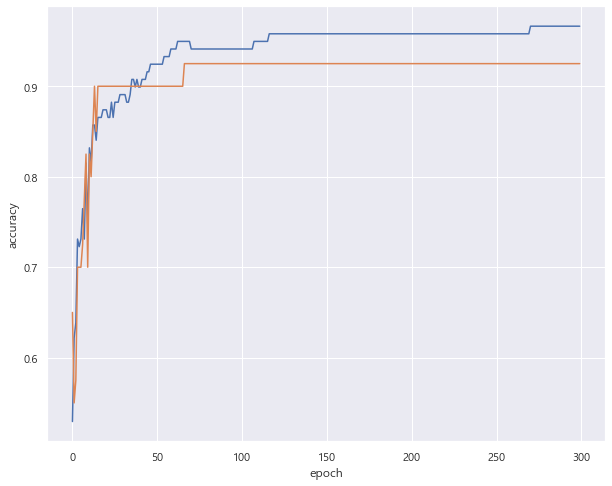

In [21]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 데이터가 적어서 뚜렷하게 보이진 않지만 이렇게 시각화해서 보면 더 직관적이고 좋다
# 두 테스트 점수가 벌어지면 안좋은거..(과대적합 의심)
# 처음부분은 둘 다 점수가 낮음(과소적합)
# 훈련세트와 테스트 세트가 가장 가까이 있는 상태 (100주변부분)

In [23]:
# 에포크를 max_iter=100로 늘려서 다시 시도

#  조기종료 가능 : 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈추는 기능
# tol : 향상될 최솟값을 지정하는 매개변수로 
# None으로 값을 주면 자동으로 멈추지 않고, max_iter 만큼 무조건 반복된다
sc = SGDClassifier(loss='log', max_iter=100, tol = None, random_state=42)
# 서포트 벡터 머신(SVM) 알고리즘에서 사용되는 손실함수의 기본값은 hinge
sc.fit(train_scaled, train_target)



# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
